__KNN is unsupervised ALGORITHM WHERE LABELS ARE NOT PRESENT. We take the nearest points around the new data point based on the values of K by finding the eucledian distance.__

Note: Make sure to select the value of K is less than the count of the classes around it. Else the data point will be misclassified.
    
        For example if k = 20. The blue data points are 7 in number.The green data points are 11 in number 
        We could clearly see the new data point being in the blue class. But as k= 20 , the data point will be labelled as 
        green

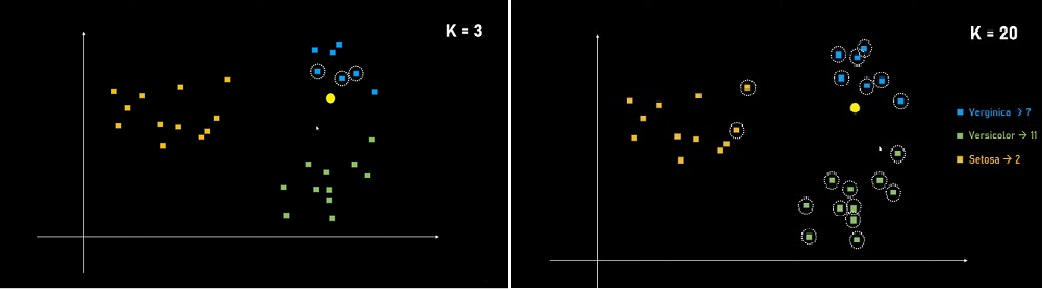

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df['target']=iris.target # This is the right way
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
#Creating separate dataframes for each target class
df0 = df[df.target==0] 
df1 = df[df.target==1]
df2 = df[df.target==2]

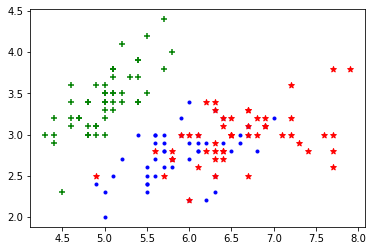

In [6]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker = '.')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',marker = '*')

In [7]:
X= df.drop(['target'],axis = 'columns')

In [8]:
y = df['target']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 2) # (flattened 2d array,1d array)

In [10]:
len(X_train), len(X_test), len(y_train), len(y_test)

(120, 30, 120, 30)

__KNN_Clasifier__

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)   #n_neighbours is nothing but k =3

In [12]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
knn_model.score(X_test,y_test)

1.0

In [14]:
knn_pred = knn_model.predict(X_test)
knn_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [15]:
type(y_test)

pandas.core.series.Series

__Confusion Matrix and Classification report__

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,knn_pred)
cm

array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  8]], dtype=int64)

Text(24.0, 0.5, 'True')

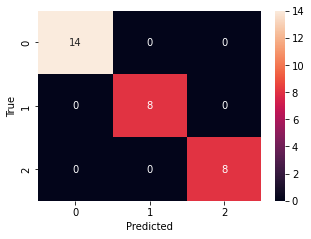

In [17]:
import seaborn as sn
plt.figure (figsize =(5,3.5))
sn.heatmap(cm, annot = True,fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("True")

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



__Cross Validation__ cv =5

In [19]:
from sklearn.model_selection import cross_val_score  # default n_splits= 5.Train test split is not required for C-validation

In [20]:
cross_val_score(knn_model,iris.data,iris.target)

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

__Parameter Tuning using For Loop__ (Default CV is 5, iterating through 1-10 values of K)

In [21]:
# Iterating through each n_neighbor= 1 to 10 and finding the scores 
neighbor_range=list(range(1,10))               # list of C values
avg_scores = {}            # dictionary 
for i in neighbor_range:
        cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=i),iris.data,iris.target) # returns list of cv = 5 scores
        avg_scores[str(i)] = np.average(cv_scores) #averages the 5 scores and adds to dictionary
avg_scores

{'1': 0.96,
 '2': 0.9466666666666665,
 '3': 0.9666666666666668,
 '4': 0.9733333333333334,
 '5': 0.9733333333333334,
 '6': 0.9800000000000001,
 '7': 0.9800000000000001,
 '8': 0.9666666666666668,
 '9': 0.9733333333333334}

In [22]:
max(avg_scores,key= avg_scores.get) #prints the key with max value in dictionary.

'6'

In [23]:
max(avg_scores.values()) #prints the maximum value in dictionary

0.9800000000000001

In [24]:
max(avg_scores.keys()) #this will just print the highest key number, not the key with highest value.

'9'

__Parameter Tuning Using GridSearch CV__ (Default CV is 5, iterating through 1-10 values of K using gridsearchCV)

In [25]:
from sklearn.model_selection import GridSearchCV #takes (estimator, param_grid, cv)

In [26]:
clf = GridSearchCV(KNeighborsClassifier(),
                   {'n_neighbors':list(range(1,10))},
                   cv = 5)

clf.fit(iris.data,iris.target)
clf.cv_results_  #results generated are key value pairs.Not easy to view. Creating pandas dataframe of results below.

{'mean_fit_time': array([0.00080085, 0.00080075, 0.00080042, 0.00080056, 0.00060058,
        0.00100074, 0.00060043, 0.00080042, 0.00060048]),
 'std_fit_time': array([4.00424071e-04, 4.00376416e-04, 4.00209555e-04, 4.00280963e-04,
        4.90368701e-04, 1.90734863e-07, 4.90251785e-04, 4.00209469e-04,
        4.90290718e-04]),
 'mean_score_time': array([0.00240154, 0.00280228, 0.00240159, 0.00260172, 0.00240116,
        0.00260172, 0.00280185, 0.00260186, 0.00260162]),
 'std_score_time': array([0.00049031, 0.0004005 , 0.00049027, 0.00049015, 0.00048994,
        0.00049006, 0.0004004 , 0.00048998, 0.00049027]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors

In [27]:
grid_df = pd.DataFrame(clf.cv_results_ )  #converting the above generated results to dataframe
grid_df   # returned whole lot of different parameter  values 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000801,4.004241e-04,0.002402,0.00049,1,{'n_neighbors': 1},0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,8
1,0.000801,4.003764e-04,0.002802,0.00040,2,{'n_neighbors': 2},0.966667,0.933333,0.933333,0.900000,1.0,0.946667,0.033993,9
2,0.000800,4.002096e-04,0.002402,0.00049,3,{'n_neighbors': 3},0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,6
3,0.000801,4.002810e-04,0.002602,0.00049,4,{'n_neighbors': 4},0.966667,0.966667,0.966667,0.966667,1.0,0.973333,0.013333,3
4,0.000601,4.903687e-04,0.002401,0.00049,5,{'n_neighbors': 5},0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,3
5,0.001001,1.907349e-07,0.002602,0.00049,6,{'n_neighbors': 6},0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
6,0.000600,4.902518e-04,0.002802,0.00040,7,{'n_neighbors': 7},0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
7,0.000800,4.002095e-04,0.002602,0.00049,8,{'n_neighbors': 8},0.966667,1.000000,0.933333,0.933333,1.0,0.966667,0.029814,6
8,0.000600,4.902907e-04,0.002602,0.00049,9,{'n_neighbors': 9},0.966667,1.000000,0.966667,0.933333,1.0,0.973333,0.024944,3


In [28]:
grid_df = grid_df[['param_n_neighbors','mean_test_score']] # selecting the required columns only
grid_df

,param_n_neighbors,mean_test_score
0,1,0.960000
1,2,0.946667
2,3,0.966667
3,4,0.973333
4,5,0.973333
5,6,0.980000
6,7,0.980000
7,8,0.966667
8,9,0.973333


In [29]:
clf.best_score_ #returns the best score out of all the combinations

0.9800000000000001

In [30]:
clf.best_params_ # returns the best combination

{'n_neighbors': 6}